In [33]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [34]:
df=pd.read_csv("/content/medical_insurance.csv")
df.head(100)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
95,28,female,37.620,1,no,southeast,3766.88380
96,54,female,30.800,3,no,southwest,12105.32000
97,55,male,38.280,0,no,southeast,10226.28420
98,56,male,19.950,0,yes,northeast,22412.64850


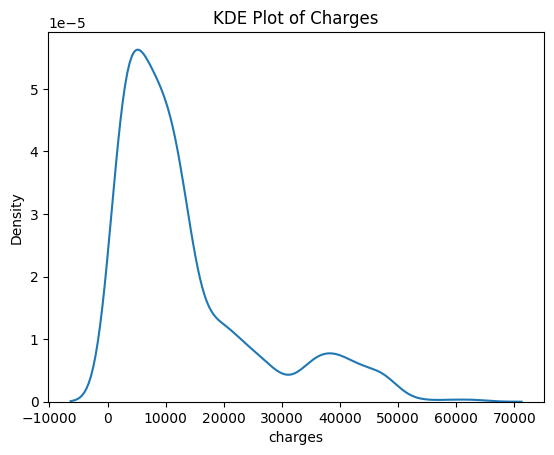

In [35]:
sns.kdeplot(data=df, x='charges')
plt.title('KDE Plot of Charges')
plt.show()

Right skewed Distribution: The KDE plot shows that most charges are concentrated at lower values , with fewer occurances of very high charges.

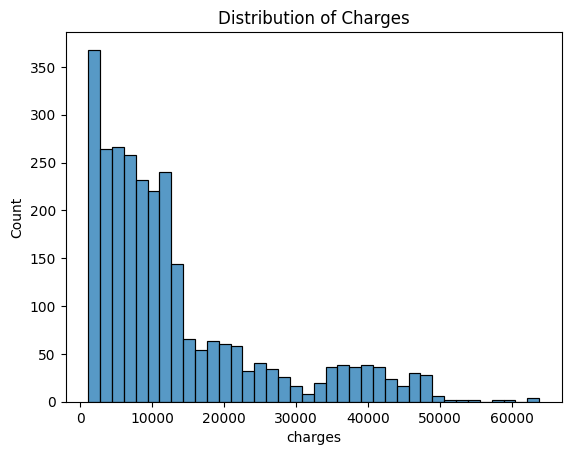

In [36]:
sns.histplot(data=df, x='charges')  # Replace 'charges' with your desired column
plt.title('Distribution of Charges')
plt.show()

The highest frequency of charges is concentrated between $0 and $10,000,indicating that most individuals incur lower medical expenses.

In [37]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


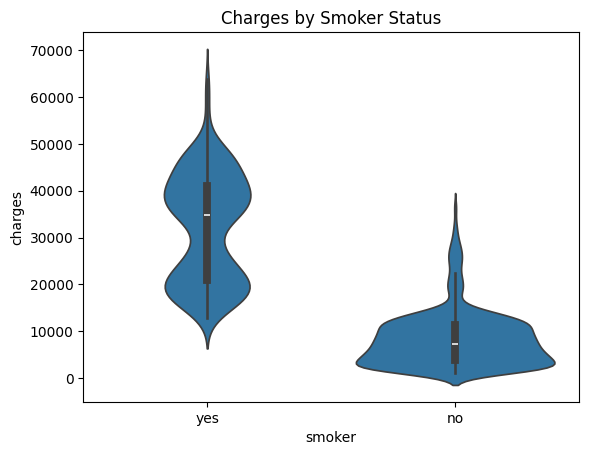

In [38]:
sns.violinplot(data=df, x='smoker', y='charges')
plt.title('Charges by Smoker Status')
plt.show()


The violin plot shows the distribution of medical charges categorized by smoker status. Smokers ("yes") tend to have a wider range of charges, with a significantly higher median and more variability in their medical costs compared to non-smokers ("no"), whose charges are much lower and more concentrated. This indicates that being a smoker is associated with higher medical charges.

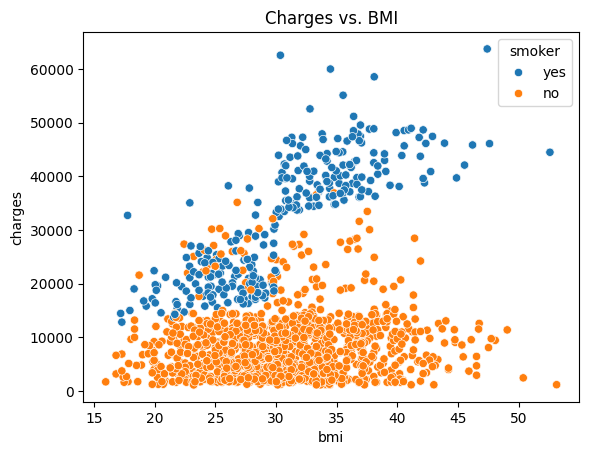

In [39]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Charges vs. BMI')
plt.show()



The scatter plot shows the relationship between BMI (body mass index) and medical charges, with points colored by smoker status. Smokers (blue dots) have significantly higher charges, especially for higher BMI values. Non-smokers (orange dots) generally incur lower charges, regardless of BMI. The plot suggests that smokers tend to have higher medical costs, and the relationship between BMI and charges is stronger for smokers, as their charges increase notably with higher BMI

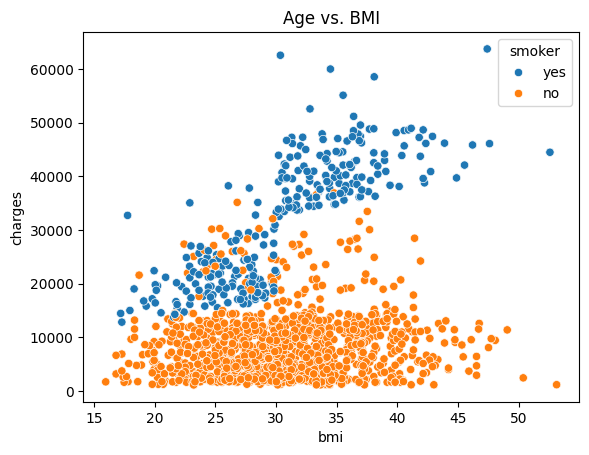

In [40]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Age vs. BMI')
plt.show()


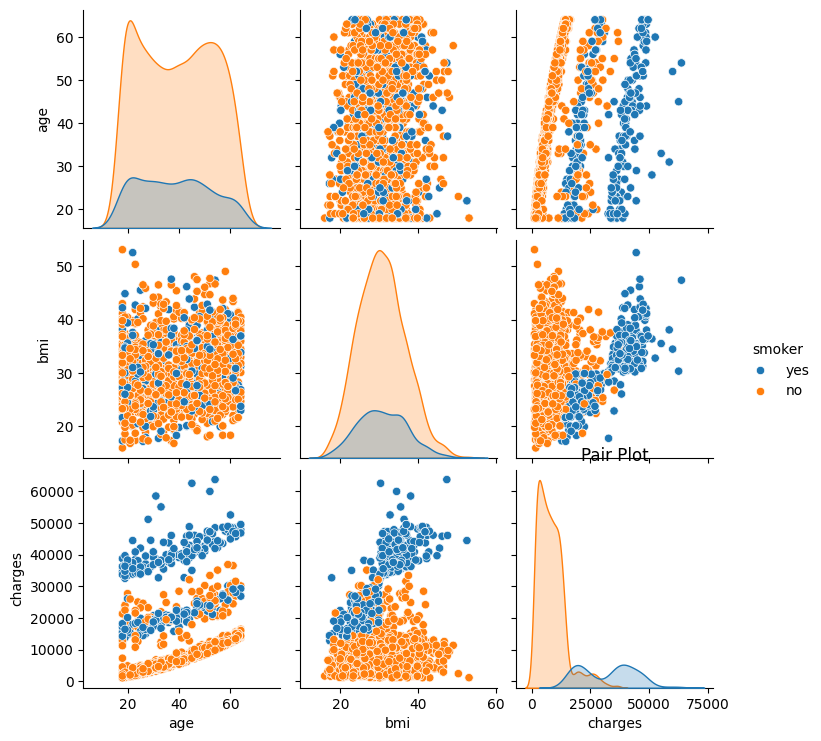

In [41]:
sns.pairplot(data=df[['age', 'bmi', 'charges', 'smoker']], hue='smoker')
plt.title('Pair Plot')
plt.show()

over all density: the density plots indicate distinct peaks in charges for smokers ,showing they generally face higher medical expenses compared to non smokers

In [42]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [43]:

import numpy as np

def find_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

def find_outliers_zscore(data):
    z_scores = np.abs(zscore(data))
    threshold = 3
    outliers = np.where(z_scores > threshold)[0]
    return outliers
outliers_iqr = find_outliers_iqr(df['charges'])
print("Outliers using IQR method:", outliers_iqr)

outliers_zscore_indices = find_outliers_zscore(df['charges'])
outliers_zscore = df['charges'][outliers_zscore_indices]
print("Outliers using Z-score method (indices):", outliers_zscore_indices)
print("Outliers using Z-score method (values):", outliers_zscore)

Outliers using IQR method: [39611.7577, 36837.467, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.13561, 36197.699, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.07448, 43943.8761, 39241.442, 42969.8527, 34439.8559, 40182.246, 34617.84065, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.89, 34806.4677, 40273.6455, 44400.4064, 40932.4295, 40419.0191, 36189.1017, 44585.45587, 43254

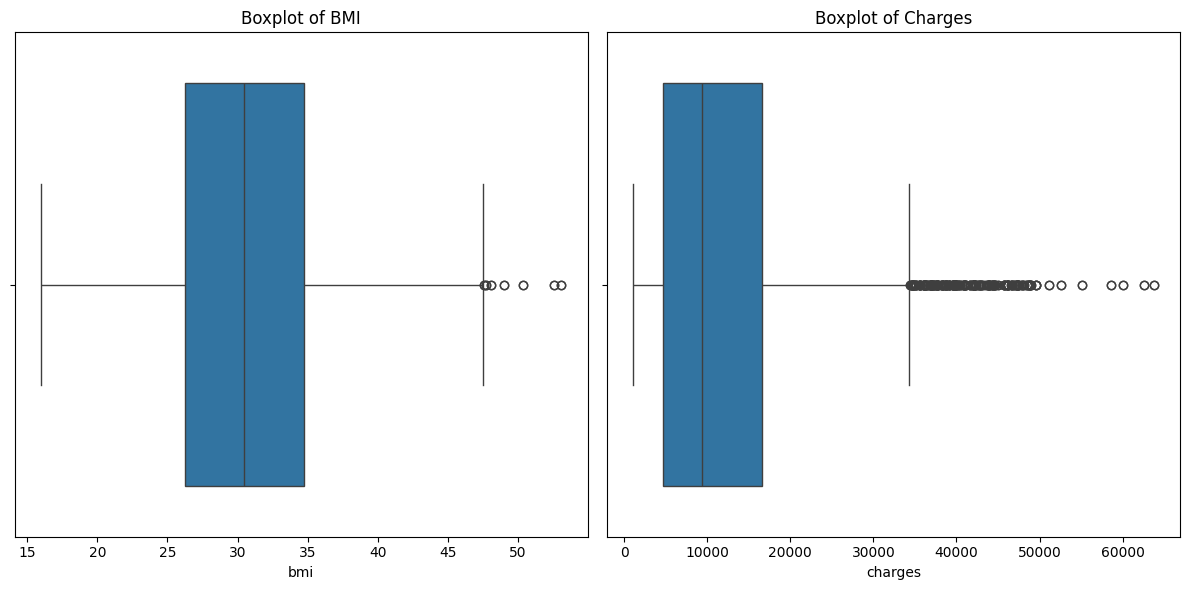

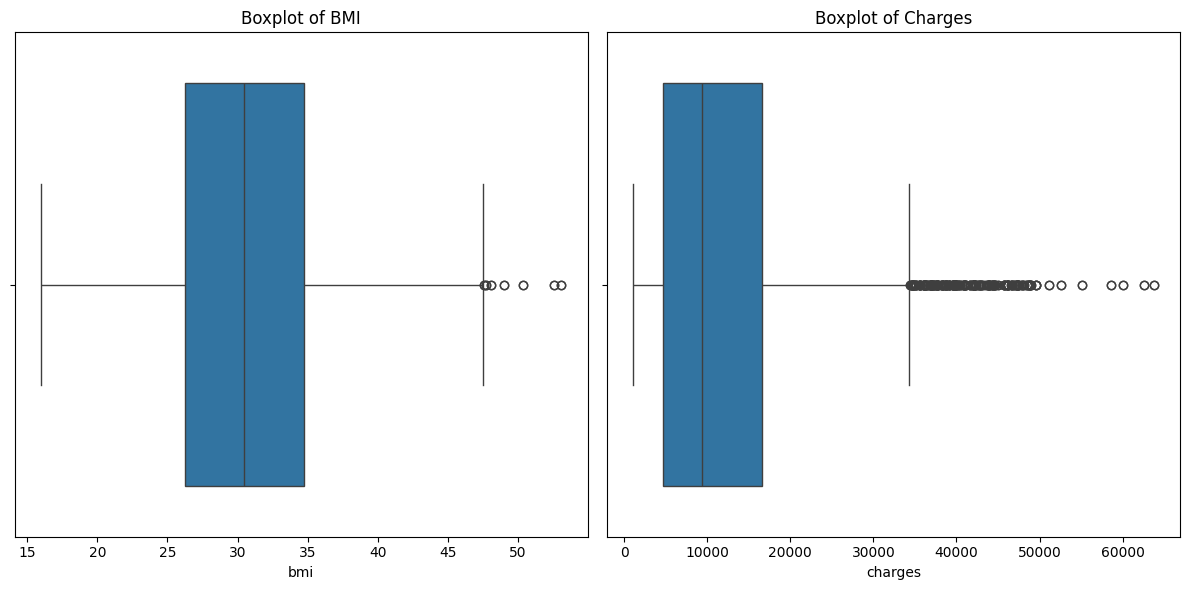

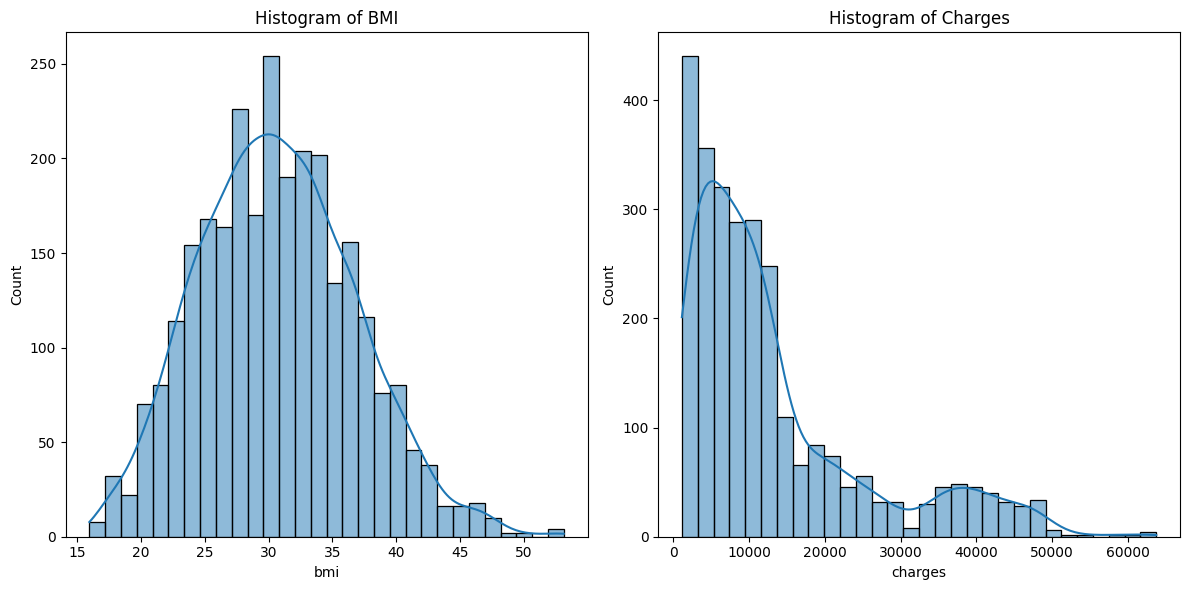

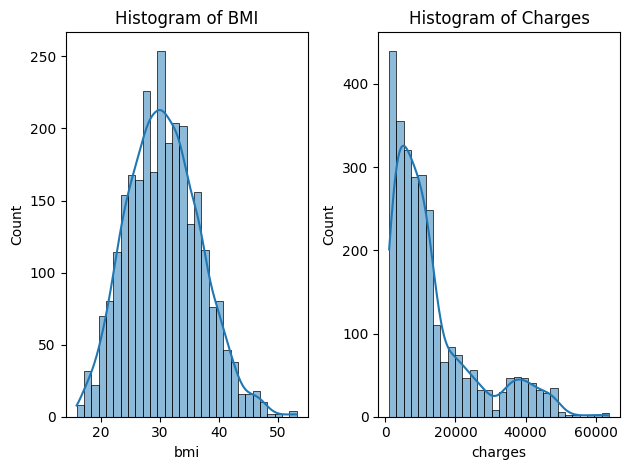

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

#Boxplot for 'bmi'
plt.subplot(1, 2, 1)
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')

 #Boxplot for 'charges'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['charges'])
plt.title('Boxplot of Charges')

plt.tight_layout()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

#Boxplot for 'bmi'
plt.subplot(1, 2, 1)
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')

#Boxplot for 'charges'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['charges'])
plt.title('Boxplot of Charges')

plt.tight_layout()
plt.show()

# histograms for 'bmi' and 'charges' to visualize distribution
plt.figure(figsize=(12, 6))

# Histogram for 'bmi'
plt.subplot(1, 2, 1)
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('Histogram of BMI')

# Histogram for 'charges'
plt.subplot(1, 2, 2)
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Histogram of Charges')

plt.tight_layout()
plt.show()
# Histogram for 'bmi'
plt.subplot(1, 2, 1)
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('Histogram of BMI')

# Histogram for 'charges'
plt.subplot(1, 2, 2)
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Histogram of Charges')

plt.tight_layout()
plt.show()


BMI: Most values lie between 25 and 35, with a few outliers beyond 45.
Charges: The median charges are concentrated at the lower end, with many outliers showing very high charges above 40,000.

Charges: The median charges are concentrated at the lower end, with many outliers showing very high charges above 40,000 in box plot.



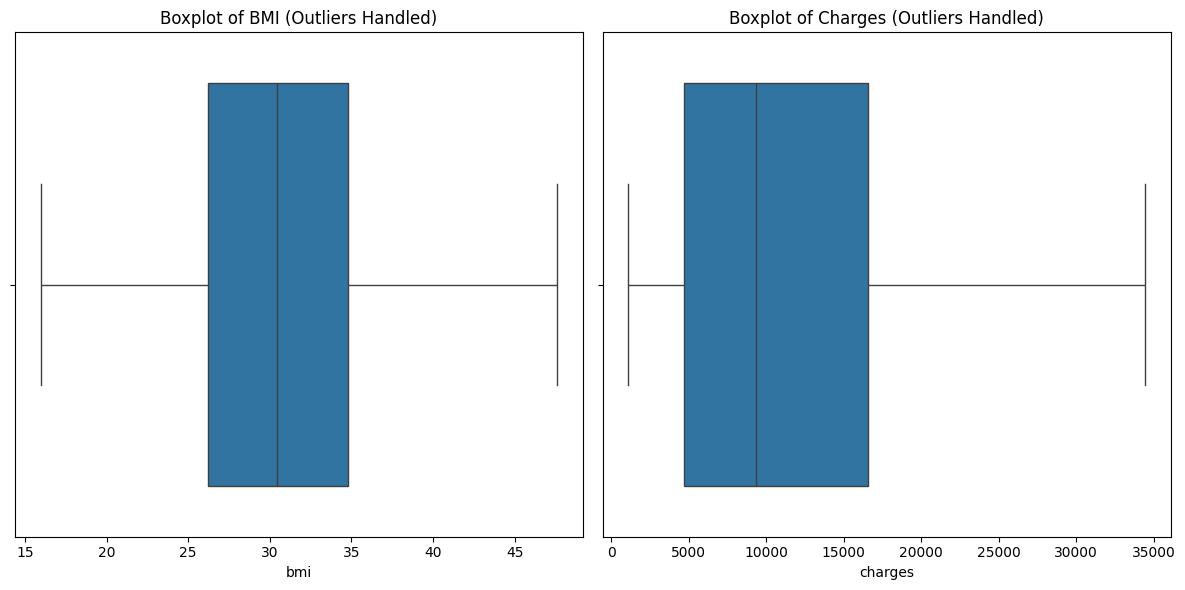

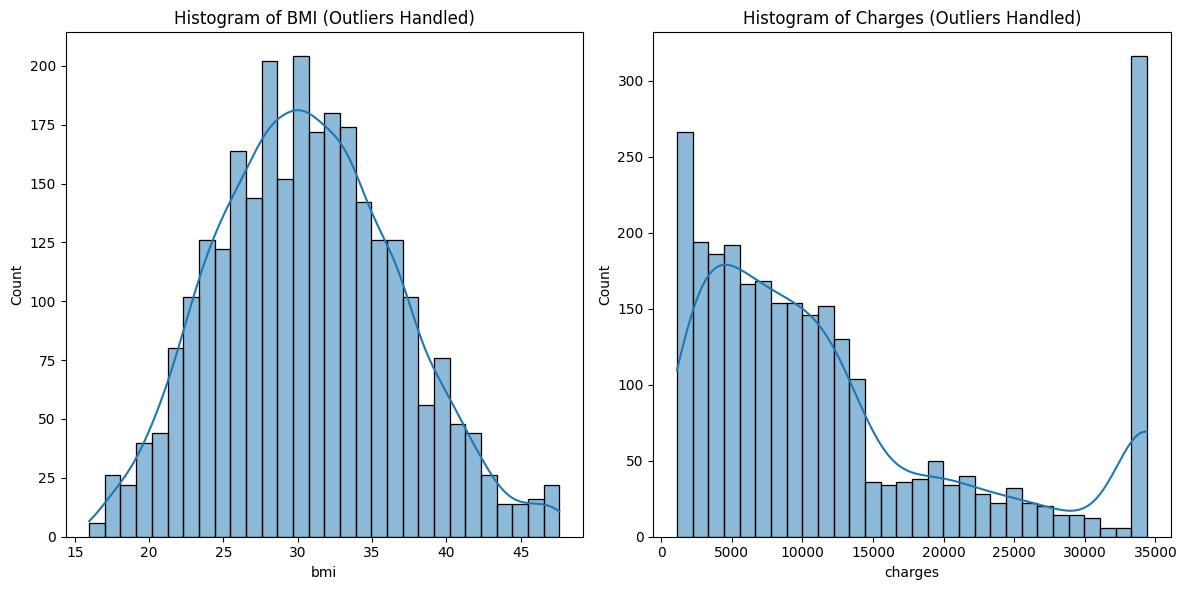

In [45]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt


def handle_outliers(df, column, method='iqr', threshold=1.5):
    if method == 'iqr':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df[column] = np.clip(df[column], lower_bound, upper_bound)
    elif method == 'zscore':
        z_scores = np.abs(zscore(df[column]))
        df[column] = np.where(z_scores < threshold, df[column], np.nan)
        df[column] = df[column].fillna(df[column].mean())

    return df
df = handle_outliers(df, 'charges', method='iqr')
df = handle_outliers(df, 'bmi', method='iqr')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI (Outliers Handled)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['charges'])
plt.title('Boxplot of Charges (Outliers Handled)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('Histogram of BMI (Outliers Handled)')

plt.subplot(1, 2, 2)
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Histogram of Charges (Outliers Handled)')

plt.tight_layout()
plt.show()

**Linear regression**

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.preprocessing import StandardScaler # Import StandardScaler


In [87]:
X = df.drop('charges', axis=1)
y = df['charges']
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [88]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
Linear_regressor = LinearRegression()
Linear_regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [99]:
y_pred = Linear_regressor.predict(X_test_scaled)

In [100]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Import mean_absolute_error


In [101]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [102]:
# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.0016852553879074137
Root Mean Squared Error (RMSE): 0.04105186217344365
R-squared (R²): 0.8130645072772518
Mean Absolute Error (MAE): 0.022032236826840135


**Random forest regressor**

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [104]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [105]:
y_pred = model.predict(X_test_scaled)

In [106]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [107]:
# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.0006374862511640489
Root Mean Squared Error (RMSE): 0.02524849007691448
R-squared (R²): 0.9292873903145912
Mean Absolute Error (MAE): 0.010813188617833152


KNeighbors Regressor

In [108]:
from sklearn.neighbors import KNeighborsRegressor

In [109]:
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune 'n_neighbors'
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [110]:
y_pred = knn.predict(X_test_scaled)

In [111]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [112]:
# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.00172672364397288
Root Mean Squared Error (RMSE): 0.04155386436870679
R-squared (R²): 0.8084646769277541
Mean Absolute Error (MAE): 0.02222791426880614


SVR

In [113]:
from sklearn.svm import SVR

In [114]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # You can tune 'C', 'gamma', and 'epsilon'
svr.fit(X_train_scaled, y_train)


SVR(C=100, gamma=0.1)

In [116]:
y_pred = svr.predict(X_test_scaled)

In [115]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [117]:
# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.00172672364397288
Root Mean Squared Error (RMSE): 0.04155386436870679
R-squared (R²): 0.8084646769277541
Mean Absolute Error (MAE): 0.02222791426880614


XGboost

In [119]:
import xgboost as xgb

In [120]:
xgboost_model = xgb.XGBRegressor(
    n_estimators=100,     # Number of boosting rounds
    max_depth=6,          # Maximum tree depth
    learning_rate=0.1,    # Step size shrinkage
    objective='reg:squarederror',  # For regression tasks
    random_state=42
)

In [121]:
xgboost_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [122]:
y_pred = xgboost_model.predict(X_test_scaled)

In [123]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [124]:
# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.0007502187369570909
Root Mean Squared Error (RMSE): 0.02739012115630544
R-squared (R²): 0.9167826370713752
Mean Absolute Error (MAE): 0.01262756235787046


In [125]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# Create the XGBoost regressor model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(xgboost_model, param_distributions=param_grid,
                                   n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                   random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get the best model and predict
best_xgboost_model = random_search.best_estimator_
y_pred = best_xgboost_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = best_xgboost_model.score(X_test_scaled, y_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Mean Squared Error (MSE): {mse}")
print(f"Best Root Mean Squared Error (RMSE): {rmse}")
print(f"Best R-squared (R²): {r2}")
print(f"Best Mean Absolute Error (MAE): {mae}")


Best Mean Squared Error (MSE): 0.0008079781937196146
Best Root Mean Squared Error (RMSE): 0.02842495723338233
Best R-squared (R²): 0.9103757194096506
Best Mean Absolute Error (MAE): 0.014477823303533892


In [129]:
!pip install gradio


In [130]:
!pip install pyngrok


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/content/medical_insurance.csv")
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=False)
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestRegressor
RF_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
RF_regressor.fit(X_train, y_train)


def predict_charges(sex, smoker, region, age, bmi, children):
    custom_input = pd.DataFrame({
        'sex': [sex],
        'smoker': [smoker],
        'region': [region],
        'age': [age],
        'bmi': [bmi],
        'children': [children],
    })

    custom_input_encoded = pd.get_dummies(custom_input, columns=['sex', 'smoker', 'region'], drop_first=True)
    train_columns = [col for col in df.columns if col != 'charges']
    missing_cols = set(train_columns) - set(custom_input_encoded.columns)
    for col in missing_cols:
        custom_input_encoded[col] = 0
    custom_input_encoded = custom_input_encoded[train_columns]

    prediction = RF_regressor.predict(custom_input_encoded)[0]
    return f"{prediction:.2f}"

iface = gr.Interface(
    fn=predict_charges,
    inputs=[
        gr.Dropdown(["male", "female"], label="Sex"),
        gr.Dropdown(["yes", "no"], label="Smoker"),
        gr.Dropdown(["northeast", "northwest", "southeast", "southwest"], label="Region"),  # Changed to gr.Dropdown
        gr.Number(label="Age"),
        gr.Number(label="BMI"),
        gr.Number(label="Children"),
    ],
    outputs=gr.Textbox(label="Predicted Charges"),
    title="Medical Insurance Charges Prediction",
    description="Predict medical insurance charges based on various factors.",
)

iface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://8f97d4d603ab8da61d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
